# Information Entropy

信息论是数学的一个分支, 它研究的是如何在有噪音的信道中传输数据.

信息论的基石是量化信息中有多少消息. 更一般的说, 这可以用于量化事件和一个随机变量的信息, 称为熵, 并使用概率来计算.


## What is Information Theory?

信息中的一个基本概念是定量事件, 随机变量和分布等信息的量化.

量化信息的数量需要使用概率, 因此信息论与概率有关.


## Calculate the Information for an Event

- **Low Probability Event:** High Information (surprising)
- **High Probability Event:** Low Information (unsurprising)

> 信息论背后的基本直觉是, 得知一件不太可能发生的时间发生了, 比得知一件可能发生的事情发生了, 提供的信息更多.

罕见时间具有更多的不确定性, 需要比普通事件拥有更多的信息来表示它们.

我们可以通过一个事件的概率来计算它的信息量. 如果事件 $x$ 是离散事件, 则:

$$
information(x) = -\log_2(p(x))
$$

上面的式子通常写作:

$$
h(x) = -\log_2(p(x))
$$

考虑抛一个公平的硬币. 正面的概率是 0.5. 我们可以计算抛到正面的信息.


In [4]:
# calculate the information for a coin flip
from math import log2
# probability of the event
p = 0.5
# calculate information for event
h = -log2(p)
print(f'p(x)={p:.3f}, information: {h:.3f} bits')
# again 
p = 0.1
h = -log2(p)
print(f'p(x)={p:.3f}, information: {h:.3f} bits')


p(x)=0.500, information: 1.000 bits
p(x)=0.100, information: 3.322 bits


为了更加清晰的理解, 我们画图来展示概率的信息曲线.

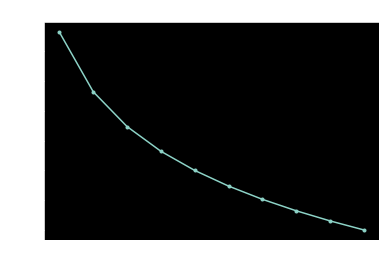

In [8]:
# compare probability vs information entropy
from math import log2
from matplotlib import pyplot as plt
import numpy as np
# list of probabilities
probs = np.linspace(0.1, 1, 10)
# calculate information
info = [-log2(p) for p in probs]
# plot probability vs information
plt.plot(probs, info, marker='.')
plt.title('Probability vs Information')
plt.xlabel('Probability')
plt.ylabel('Information')
plt.show()


## Calculate the Entropy for a Random Variable

计算随机变量的信息, 称之为 "信息熵", 或简称 "熵".

熵的计算, 对于随机变量 $X$, 有 $k$ 个离散值在 $K$ 中:

$$
H(X) = -\sum_{k \in K} (P(k) * log_b(P(k)))
$$

这里的 $b$ 是对数的底, 底可以是 2, $e$, 10. 不同的底针对不同的熵的单位, 当 $b=2$ 时熵的单位是 *bits*, $b=e$ 是 *nats*, $b=10$ 是 *bans*.

最小熵是为一个概率为 1.0 的随机变量计算的. 一个随机变量的最大熵是所有事件的概率是相等的.


In [10]:
# calculate the entropy for a dice roll
from math import log2
# the number of event
n = 6
# probability of one event
p = 1.0 / 6
# calculate entropy
entropy = -sum([p * log2(p) for _ in range(n)])
print(f'entropy: {entropy:.3f} bits')

entropy: 2.585 bits


如果我们知道每个事件的概率, 就可以使用 `entropy()` SciPy function 去直接计算熵.

In [14]:
# calculate the entropy for a dice roll
from scipy.stats import entropy
# discrete probabilities
p = [1/6] * 6
# calculate entropy
e = entropy(p, base=2)
print(f'entropy: {e:.3f} bits')

entropy: 2.585 bits


- **Skewed Probability Distribution** (unsurprising): Low entropy.
- **Balanced Probability Distribution** (surprising): High entropy.

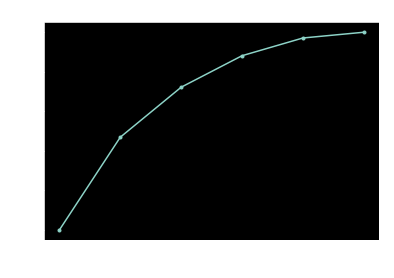

In [19]:
# compare probability distributions vs entropy
from math import log2
from matplotlib import pyplot as plt
# calculate entropy
def entropy(events, ets=1e-15):
  return -sum([p * log2(p + ets) for p in events])
# define probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# create probability distribution
dists = [[p, 1.0 - p] for p in probs]
# calculate entropy for each distribution
ents = [entropy(d) for d in dists]
# plot probability distribution vs entropy
plt.plot(probs, ents, marker='.')
plt.title('Probability Distribution vs Entropy')
plt.xticks(probs, [str(d) for d in dists])
plt.xlabel('Probability Distribution')
plt.ylabel('Entropy (bits)')
plt.show()

 上面的图揭示了事件的分布从偏斜到均衡熵逐步递增的情况.

## References

- [A Gentle Introduction to Information Entropy](https://machinelearningmastery.com/what-is-information-entropy/)